# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[-1.26107869,  0.40424709],
        [ 1.05245823,  0.52158746],
        [-1.23739438,  0.32086904],
        [-1.51921293, -1.08086317],
        [ 1.14771353, -0.40545771]]),
 array([0, 0, 1, 1, 0]))

In [4]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [5]:
# sampling
n = 500
Y_generative = [1]*500 + [-1]*500
X_generative = np.concatenate([np.random.multivariate_normal(m1, sigma, n),
                          np.random.multivariate_normal(m2, sigma, n)])
                         

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [6]:
# computing beta_0 and beta using the formulas
pi = 1/2
B0 = np.log(pi / (1 - pi)) + 1/2 * (m2 - m1).T @ np.linalg.inv(sigma) @ (m2 - m1)
B1 = np.linalg.inv(sigma) @ (m1 - m2)
B0, B1

(2.0, array([2., 2.]))

In [7]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.15299577]), array([[2.08596872, 2.11003568]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [9]:
# sampling
n = 1000
B0 = -2
B1 = np.array([2, 2])
which_to_choose = np.random.binomial(1, 0.5, n)
X_discriminative1 = np.random.multivariate_normal(m1, sigma, sum(which_to_choose))
X_discriminative2 = np.random.multivariate_normal(m2, sigma, n - sum(which_to_choose))
X_discriminative = np.concatenate([X_discriminative1, X_discriminative2])
weights = 1 / (1 + np.exp(- B0 - X_discriminative @ B1))
Y_discriminative = np.random.binomial(1, weights, n)

In [11]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)

LogisticRegression(penalty=None)

#### Second bullet point

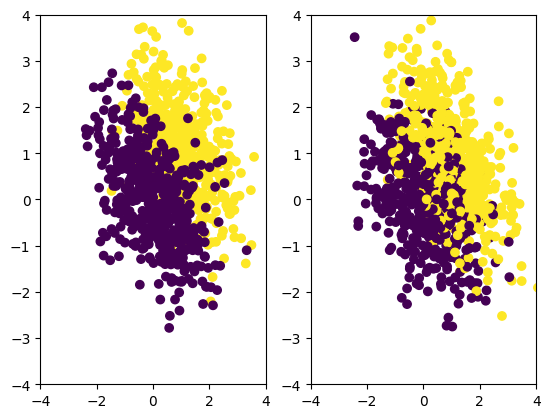

In [12]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0], X_generative[:,1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:,0], X_discriminative[:,1], c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

In [14]:
# sampling

n1 = 1000
n2 = 2000
Beta1 = 1

x1 = np.random.exponential(1, n1)
x2 = np.random.exponential(1/(Beta1 + 1), n2)

x = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [17]:
# a model
model = LogisticRegression(penalty=None)
model.fit(x, y)
(model.intercept_, model.coef_)

(array([-1.41197144]), array([[1.05432208]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

...

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

In [24]:
beta1 = 1
pi = n1/(n1 + n2)
beta0 = -np.log((1 - pi)/pi * (beta1 + 1))
beta0

def func(pi, beta1):
    return -np.log((1 - pi)/pi * (beta1 + 1))


## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)